## Import the necessary libraries

In [43]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt 

from datetime import date
import math
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns


## Read data from CSV file

In [44]:
df = pd.read_csv("2023-02-20.csv")
# df = pd.read_csv(f"{date.today()}.csv")
df = df.drop(df.columns[0], axis=1)
df

,"Country, Other",Total Cases,Total Deaths,Total Recovered,Active Cases,"Serious, Critical",1M pop,Deaths/ 1M pop,Total Tests,Tests/ 1M pop,Population,Continent
0,USA,105820390,1151253.0,103485147.0,1183990.0,2261.0,316065.0,3439.0,1.169977e+09,3494499.0,3.348053e+08,North America
1,India,44693506,530795.0,44157685.0,5026.0,NaN,31773.0,377.0,9.200129e+08,654054.0,1.406632e+09,Asia
2,France,39690610,165314.0,39447509.0,77787.0,869.0,605183.0,2521.0,2.714902e+08,4139547.0,6.558452e+07,Europe
3,Germany,38291497,169579.0,37931300.0,190618.0,NaN,456484.0,2022.0,1.223324e+08,1458359.0,8.388360e+07,Europe
4,Brazil,37145514,699634.0,36249161.0,196719.0,NaN,172486.0,3249.0,6.377617e+07,296146.0,2.153536e+08,South America
...,...,...,...,...,...,...,...,...,...,...,...,...
226,Diamond Princess,712,13.0,699.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
227,Vatican City,29,NaN,29.0,0.0,NaN,36295.0,NaN,NaN,NaN,7.990000e+02,Europe
228,Western Sahara,10,1.0,9.0,0.0,NaN,16.0,2.0,NaN,NaN,6.261610e+05,Africa
229,MS Zaandam,9,2.0,7.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


---

# Visualization
## Correlation between 2 attributes

In [45]:
def correlation_2_attr(attr1, attr2):
    x_values = df[f'{attr1}'].apply(lambda x: math.log10(x))
    y_values = df[f'{attr2}'].apply(lambda x: math.log10(x))
    plt.scatter(x_values, y_values)
    plt.title(f'{attr1} and {attr2} Correlation (log scale)')
    plt.xlabel(attr1)
    plt.ylabel(attr2)
    plt.plot([0, max(x_values)], [0, max(x_values)], label=f'Where {attr1} equals to {attr2}')
    plt.legend()
    plt.show()

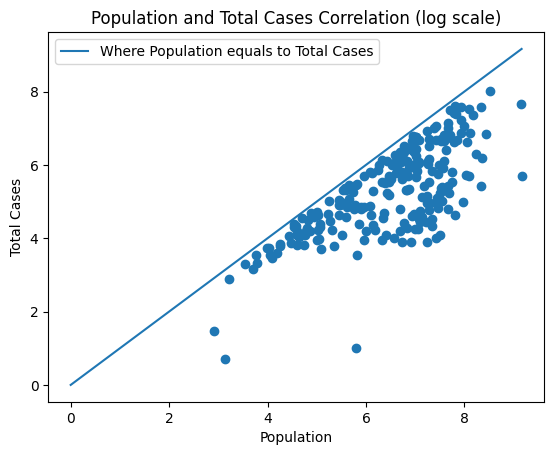

In [46]:
correlation_2_attr('Population','Total Cases')

`Comment:`
- The higher Population, The higher Total Cases (they have positive linear correlation).

- Many countries have very high rates of covid infection (data points lie near the mean line).

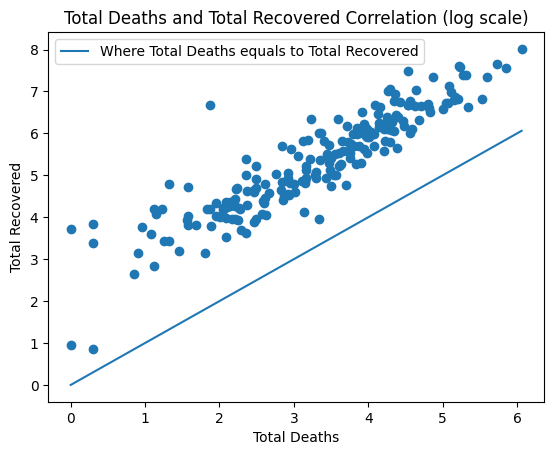

In [47]:
correlation_2_attr('Total Deaths','Total Recovered')

`Comment:` 
- All countries have more recovered cases than death cases (all points are above the mean line).
- Recovered cases and death cases have positive linear correlation.


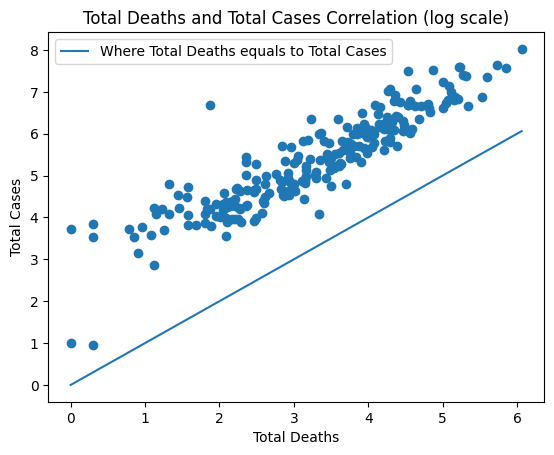

In [48]:
correlation_2_attr('Total Deaths','Total Cases')

`Comment:` 
- There doesn't seem to be a difference with the previous chart.
- All points are above the mean line.
- The higher Total Cases, the higher Total Deaths (positive linear correlation).

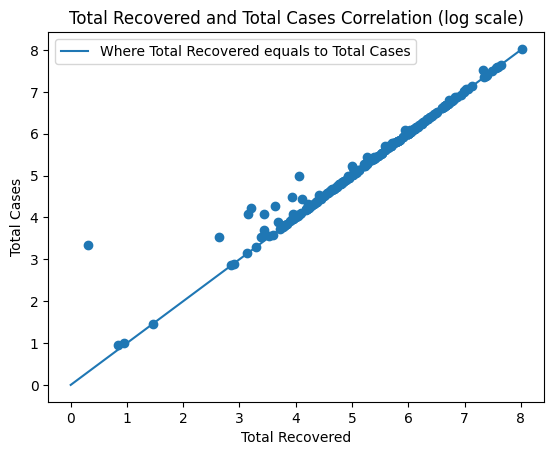

In [49]:
correlation_2_attr('Total Recovered','Total Cases')

`Comment:`
- Surprisingly, most of the data points lie on the mean line that means most covid cases will recover.
- The higher Total Cases, the higher Total Recovered (highly positive linear correlation).


### Overview of the epidemic situation in the world and continent

In [50]:
fig = go.Figure(data = go.Choropleth(locations = df['Country, Other'],locationmode = 'country names',z = df['Total Cases'],text = df['Country, Other'],
    colorscale = 'viridis',
    autocolorscale = False,
    reversescale = True,
    colorbar_title = 'Total Covid Cases',
))
fig.update_layout(title_text = 'Covid-19',geo = dict(showframe = False,showcoastlines = False,projection_type = 'orthographic'))
fig.show()

`Comment`:

In [51]:
Continent = df[['Total Cases','Total Deaths','Total Recovered','Active Cases','Continent']]
Continent = Continent.groupby('Continent').sum()
Continent

,Total Cases,Total Deaths,Total Recovered,Active Cases
Continent,,,,
Africa,12804066,258622.0,10960402.0,371523.0
Asia,214886296,1539191.0,182680690.0,13507917.0
Australia/Oceania,14039429,26245.0,13816004.0,71198.0
Europe,247239841,2025193.0,242688622.0,2244565.0
North America,125219277,1617774.0,120559867.0,2138146.0
South America,68168219,1351609.0,65601434.0,345351.0


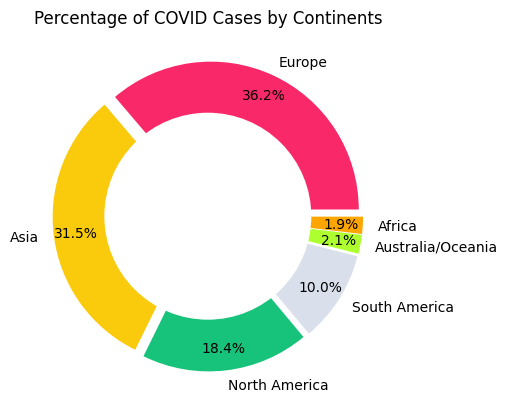

In [52]:
def donut_attri_product(attr):
	data = Continent.sort_values(by=attr, ascending=0)
	colors = ['#F92969','#FACA0C','#17C37B','#D9DFEB','#ADFF2F','#FFA500']
	explode = [0.05]*6 #width of each curve

	plt.pie(data[f'{attr}'], colors=colors, labels=data.index,
			autopct='%1.1f%%', pctdistance=0.85, explode=explode)

	# draw circle
	centre_circle = plt.Circle((0, 0), 0.70, fc='white')
	fig = plt.gcf()

	# Adding Circle in Pie chart
	fig.gca().add_artist(centre_circle)

	plt.title(f'Percentage of COVID Cases by Continents')
	plt.show()

donut_attri_product('Total Cases')

`Comment:`
- There is a large disparity between the largest % Total Cases (Europe - 37.6%) and the smallest % Total Cases (Africa - 1.8%).  Meanwhile, Europe is the continent with the most advanced health in the world, and Africa is less developed and has a larger population.

- Asia is the origin of the disease and the most populous in the world, but it also ranks second in the chart with 29.4%.

- Radar chart code is referenced from [website](https://betterdatascience.com/radar-charts-matplotlib-plotly/)

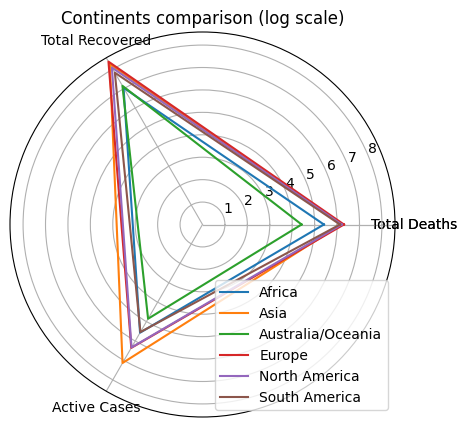

In [53]:
categories = list(Continent.columns[1:4])
categories = [*categories,categories[0]]# copy the first element to the last element to make a triangel

label_loc = np.linspace(start=0, stop=2*np.pi, num=4)# distribute 3 axes

plt.figure(figsize=(5, 5))
plt.subplot(polar=True)
for i in range(len(Continent.index)):
    data = list(Continent.iloc[i,1:4].apply(lambda x: math.log10(x)))
    plt.plot(label_loc, [*data,data[0]], label=Continent.index[i])

plt.title('Continents comparison (log scale)')
lines, labels = plt.thetagrids(np.degrees(label_loc), labels=categories)
plt.legend()
plt.show()

`Comment:` 
- The epidemic in Asia is still the most intense (has the highest Active Cases), followed by Europe and North America; Africa and South America are close together; Australia/Oceania is the lowest.
- Total Deaths of Europe, Asia, North America and South America is quite close.
- There is a big difference in the Total Deaths in Australia/Oceania compared to other continents.
- Since there are nearly equal Total Cases, and the Total Deaths is lower in Australia/Oceania than in Africa, the Total Recovered in Australia/Oceania is higher than in Africa. 
- Total Recovered in Asia and North America is also a reversal compared to the order in the Total Deaths. The remaining continents still keep their respective order in the Total Deaths


In [54]:
fig=go.Figure(data=[
      go.Bar(name='Total cases',x=Continent.index,y=Continent['Total Cases'],text=Continent['Total Cases']),
      go.Bar(name='Total Deaths',x=Continent.index,y=Continent['Total Deaths'],text=Continent['Total Deaths']),
      go.Bar(name='Total Recovered',x=Continent.index,y=Continent['Total Recovered'],text=Continent['Total Recovered'])
   ])
fig.update_layout(barmode='group')
fig.update_traces(texttemplate='%{text:.4s}', textposition='outside')
fig.update_layout(yaxis_range=[0,300000000])
fig.show()

`Comment`:

In [55]:
# Continent need to be dropna before calculating, it makes sure that sum of percentage is 100%
Continent = df[['Total Cases','Total Deaths','Total Recovered','Active Cases','Continent']]
Continent = Continent.dropna().groupby('Continent').sum()#.astype(int)
Continent

,Total Cases,Total Deaths,Total Recovered,Active Cases
Continent,,,,
Africa,11557876,228117.0,10960400.0,369359.0
Asia,197625548,1436941.0,182680690.0,13507917.0
Australia/Oceania,13908978,25380.0,13815213.0,68385.0
Europe,246957978,2024820.0,242688593.0,2244565.0
North America,124302498,1604485.0,120559867.0,2138146.0
South America,67275179,1330324.0,65599504.0,345351.0


In [56]:
percent_continent = Continent[['Total Recovered','Total Deaths','Active Cases']].div(Continent['Total Cases'], 0)*100
percent_continent

,Total Recovered,Total Deaths,Active Cases
Continent,,,
Africa,94.830573,1.973693,3.195734
Asia,92.437790,0.727103,6.835107
Australia/Oceania,99.325867,0.182472,0.491661
Europe,98.271210,0.819905,0.908885
North America,96.989094,1.290791,1.720115
South America,97.509223,1.977437,0.513341


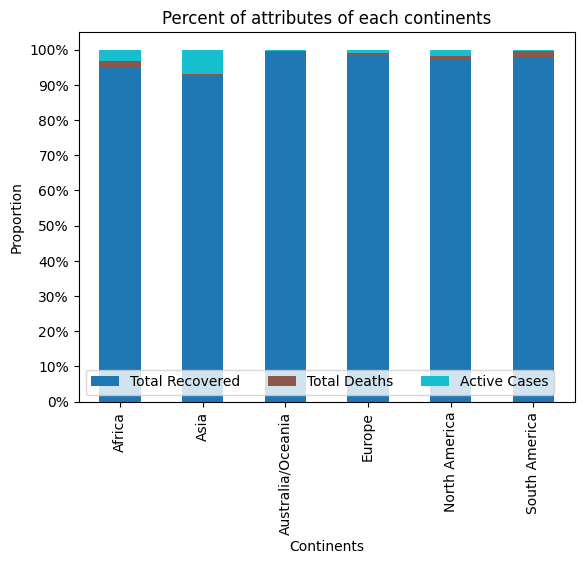

In [57]:
from matplotlib.ticker import FormatStrFormatter

percent_continent.plot(kind='bar', stacked=True, colormap='tab10')

plt.title('Percent of attributes of each continents')
plt.legend(ncol=3)
plt.xlabel("Continents")
plt.ylabel("Proportion")
plt.yticks(range(0,101,10))
plt.gca().yaxis.set_major_formatter(FormatStrFormatter('%d%%'))# add unit %
plt.show()

`Comment:`
- The Recovery rate is high in all continents
- Asia and Africa still have high active cases (Asia is the highest one in countries such as Vietnam, Russia, Taiwan, China, etc).
- Australia/Oceania seems to be dealing with Covid epidemic most effectively.
- Europe deals with Covid epidemic well, Despites of having the highest Total Cases.
- Meanwhile, Africa and South America have the highest Deaths ratio because they have less developed health systems than other continents in general.


## Analysis of epidemic situation in continents


In [58]:
newDf1 = df[['Tests/ 1M pop','Continent']]
ContinentForTest = newDf1.dropna().groupby('Continent').mean().astype(int).apply(lambda x: x/pow(10,4))
ContinentForTest.rename(columns = {'Tests/ 1M pop':'Test rate per person'}, inplace = True)
ContinentForTest = ContinentForTest.sort_values('Test rate per person')

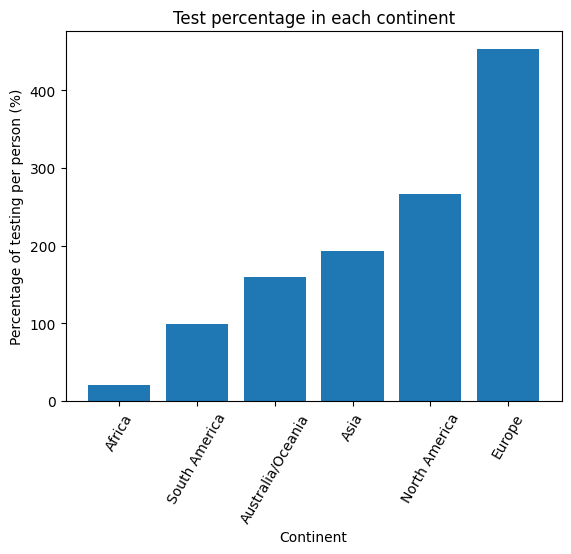

In [59]:
fig, ax = plt.subplots()
continents = list(ContinentForTest.index)
numCon0 = np.arange(0,len(continents))  
raito = ContinentForTest['Test rate per person'].values
ax.bar(continents,raito) 
ax.set_ylabel('Percentage of testing per person (%)')
ax.set_xlabel('Continent')
ax.set_title('Test percentage in each continent')
plt.xticks(numCon0,continents,rotation=60)
plt.show()

`Comment:` 
- The rate of testing in Europe is the highest, and much higher than that of other continents, especially here in Asia, where the outbreak of the disease, but the rate of testing in Asia is lower than the whole of Europe and North America.

In [60]:
newDf3 = df[['1M pop','Continent']]
ContinentForCase = newDf3.dropna().groupby('Continent').mean().astype(int).apply(lambda x: x/pow(10,4))
ContinentForCase.rename(columns = {'1M pop':'Case rate'}, inplace = True)
ContinentForCase = ContinentForCase.sort_values('Case rate')

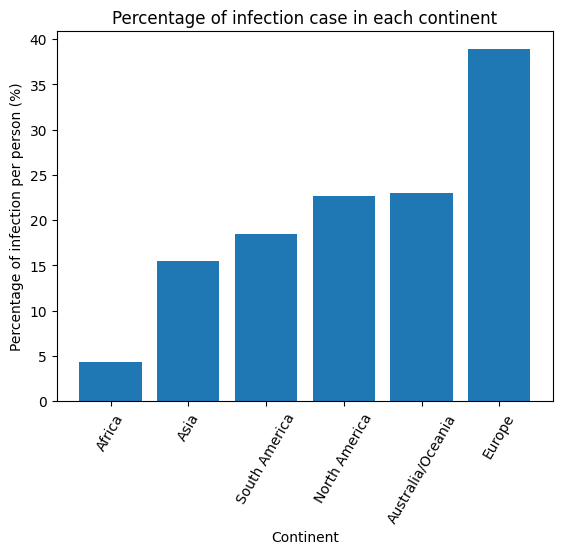

In [61]:
fig, ax = plt.subplots()
ContinentForCaseIndex = list(ContinentForCase.index)
numCon1 = np.arange(0,len(ContinentForCaseIndex))  
raito = ContinentForCase['Case rate'].values
ax.bar(ContinentForCaseIndex,raito) 
ax.set_ylabel('Percentage of infection per person (%)')
ax.set_xlabel('Continent')
ax.set_title('Percentage of infection case in each continent')
plt.xticks(numCon1,ContinentForCaseIndex,rotation = 60)
plt.show()

`Comment: `
- The rate of infection in Europe leads, and is many times higher than in other continents.

In [62]:
newDf2 = df[['Deaths/ 1M pop','Continent']]
ContinentForDeath = newDf2.dropna().groupby('Continent').mean().astype(int).apply(lambda x: x/pow(10,4))
ContinentForDeath.rename(columns = {'Deaths/ 1M pop':'Death rate per person'}, inplace = True)
ContinentForDeath = ContinentForDeath.sort_values('Death rate per person')

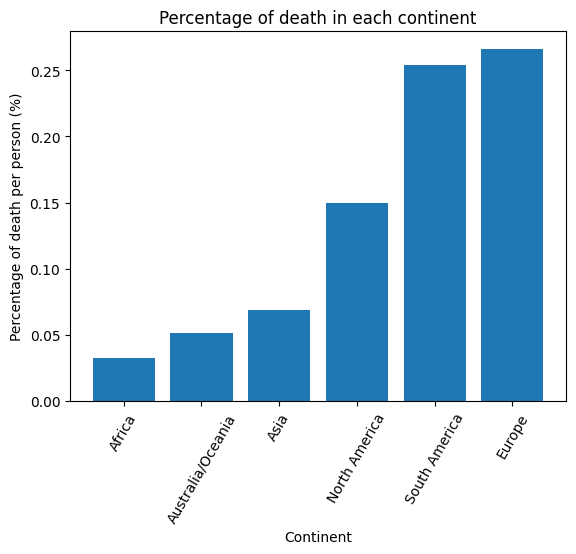

In [63]:
fig, ax = plt.subplots()
continents1 = list(ContinentForDeath.index)
numCon1 = np.arange(0,len(continents1))  
raito = ContinentForDeath['Death rate per person'].values
ax.bar(continents1,raito) 
ax.set_ylabel('Percentage of death per person (%)')
ax.set_xlabel('Continent')
ax.set_title('Percentage of death in each continent')
plt.xticks(numCon1,continents1,rotation = 60)
plt.show()

`Comment:` 
- Europe is the place with the highest death rate from infection, the second highest death rate is South America, the lowest mortality rate is Africa. A special feature here when Asia is the outbreak of the disease but has a low mortality rate in the group of continents with low mortality rates.

In [64]:
newDf3 = df[['Tests/ 1M pop','1M pop','Continent']]
Continent2 = newDf3.dropna().groupby('Continent').mean().astype(int).apply(lambda x: round(x/pow(10,4),1))
Continent2.rename(columns = {'1M pop':'Ratio of infection per person'}, inplace = True)
Continent2.rename(columns = {'Tests/ 1M pop':'Percentage of testing per person'}, inplace = True)
Continent2 = Continent2.sort_values('Ratio of infection per person')

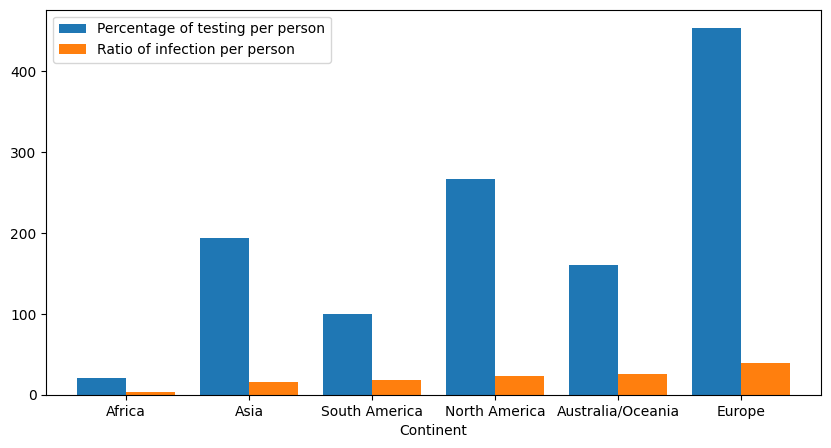

In [65]:
Continent2.plot.bar(rot=0,width=0.8,figsize=(10,5));

`Comment:` 
- There is an unequal distribution between testing rates and infection rates in different continents, with higher testing rates in Asia than in South America, but higher rates of infection in Asia. Therefore, these two rates have different proportions in each continent, but in general terms, as the rate of testing increases, so does the incidence of the disease.

In [66]:
newDf23 = df[['1M pop','Deaths/ 1M pop','Continent']]
Continent23 = newDf23.dropna().groupby('Continent').mean().astype(int).apply(lambda x: x/pow(10,4))
Continent23.rename(columns = {'1M pop':'Percentage of infection per person'}, inplace = True)
Continent23.rename(columns = {'Deaths/ 1M pop':'Percentage of death per person'}, inplace = True)
Continent23 = Continent23.sort_values('Percentage of death per person')

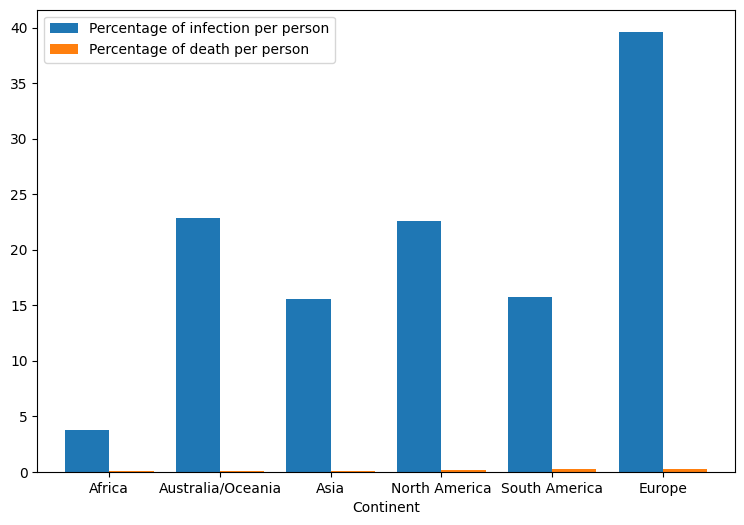

In [67]:
Continent23.plot.bar(rot=0,width=0.8,figsize=(9,6));

`Comment:` 
- There is an uneven distribution of morbidity and mortality in different continents, in particular in Australia/Oceania where the incidence is higher than in Asia but the mortality in Asia is low. than Asia. Therefore, these two rates have different proportions in each continent, but in general, the increased morbidity rate, the mortality rate also increases.

In [68]:
newDf4 = df[['Country, Other','Total Cases','Population', 'Continent']].dropna()
newDf4['Rate case per population (%)'] = newDf4['Total Cases']*100/newDf4['Population']
nationCase = newDf4.sort_values('Rate case per population (%)', ascending=False)
nationCase = nationCase[['Country, Other','Continent','Rate case per population (%)']]

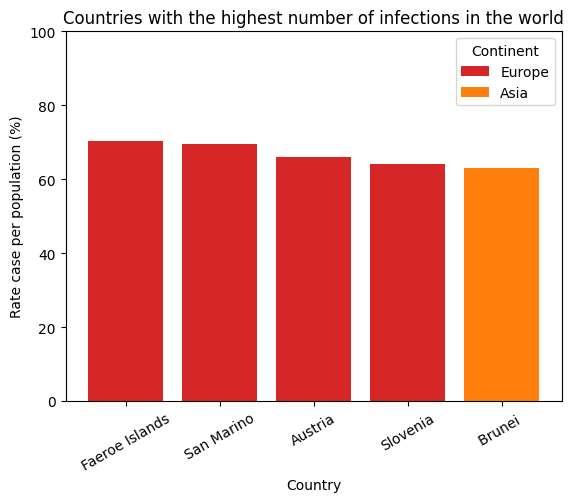

In [69]:
fig, ax = plt.subplots()
country = list(nationCase['Country, Other'])
values = np.array(nationCase['Rate case per population (%)'])
bar_labels = ['Europe','Europe','Europe','Europe','Asia']
bar_colors = ['tab:red','tab:red','tab:red','tab:red','tab:orange']
ax.bar(country[0],values[0], label = bar_labels[0], color = bar_colors[0])
ax.bar(country[1],values[1], color = bar_colors[1])
ax.bar(country[2],values[2], color = bar_colors[2])
ax.bar(country[3],values[3], color = bar_colors[3])
ax.bar(country[4],values[4], label = bar_labels[4], color = bar_colors[4])
ax.set_ylabel('Rate case per population (%)')
ax.set_xlabel('Country')
ax.set_title('Countries with the highest number of infections in the world')
ax.legend(title = 'Continent')
plt.xticks(rotation = 30)
ax.set_ylim(0,100)
plt.show()

`Comment: `
- The top 5 countries with the highest percentage of infected populations are European countries and one country in Asia, the rate of population infected in the top 5 countries is quite high in the range of 62% to 70%.
- The WHO recommends that when the proportion of the population infected with COVID-19 exceeds 10% of the total population of a particular area, the health system in that area may become overwhelmed and unable to provide adequate supplies provide medical services to people with COVID-19 and other illnesses. This shows that the epidemic situation in these countries is quite serious, which does not exclude the possibility that reinfection cases exist in the data, but the number of such populations is quite high.
- This could potentially lead to an overload of the medical department.

### Top 10 countries with the highest number of infections in the world

In [70]:
top_10=df.sort_values(by=['Total Cases'],ascending=False)[:10]
top_10 

,"Country, Other",Total Cases,Total Deaths,Total Recovered,Active Cases,"Serious, Critical",1M pop,Deaths/ 1M pop,Total Tests,Tests/ 1M pop,Population,Continent
0,USA,105820390,1151253.0,103485147.0,1183990.0,2261.0,316065.0,3439.0,1.169977e+09,3494499.0,3.348053e+08,North America
1,India,44693506,530795.0,44157685.0,5026.0,NaN,31773.0,377.0,9.200129e+08,654054.0,1.406632e+09,Asia
2,France,39690610,165314.0,39447509.0,77787.0,869.0,605183.0,2521.0,2.714902e+08,4139547.0,6.558452e+07,Europe
3,Germany,38291497,169579.0,37931300.0,190618.0,NaN,456484.0,2022.0,1.223324e+08,1458359.0,8.388360e+07,Europe
4,Brazil,37145514,699634.0,36249161.0,196719.0,NaN,172486.0,3249.0,6.377617e+07,296146.0,2.153536e+08,South America
5,Japan,33361299,73439.0,21706932.0,11580928.0,96.0,265648.0,585.0,9.667154e+07,769771.0,1.255848e+08,Asia
6,S. Korea,30681228,34155.0,30468756.0,178317.0,140.0,597726.0,665.0,1.580406e+07,307892.0,5.132990e+07,Asia
7,Italy,25651205,188750.0,25320467.0,141988.0,104.0,425656.0,3132.0,2.691271e+08,4465893.0,6.026277e+07,Europe
8,UK,24423396,208458.0,24147123.0,67815.0,NaN,356557.0,3043.0,5.225265e+08,7628357.0,6.849791e+07,Europe
9,Russia,22480857,396769.0,21829610.0,254478.0,NaN,154183.0,2721.0,2.734000e+08,1875095.0,1.458059e+08,Europe


#### 1. Reviews of Total Cases, Total Recovered, Total Deaths, Active Cases:

<AxesSubplot: xlabel='Country, Other'>

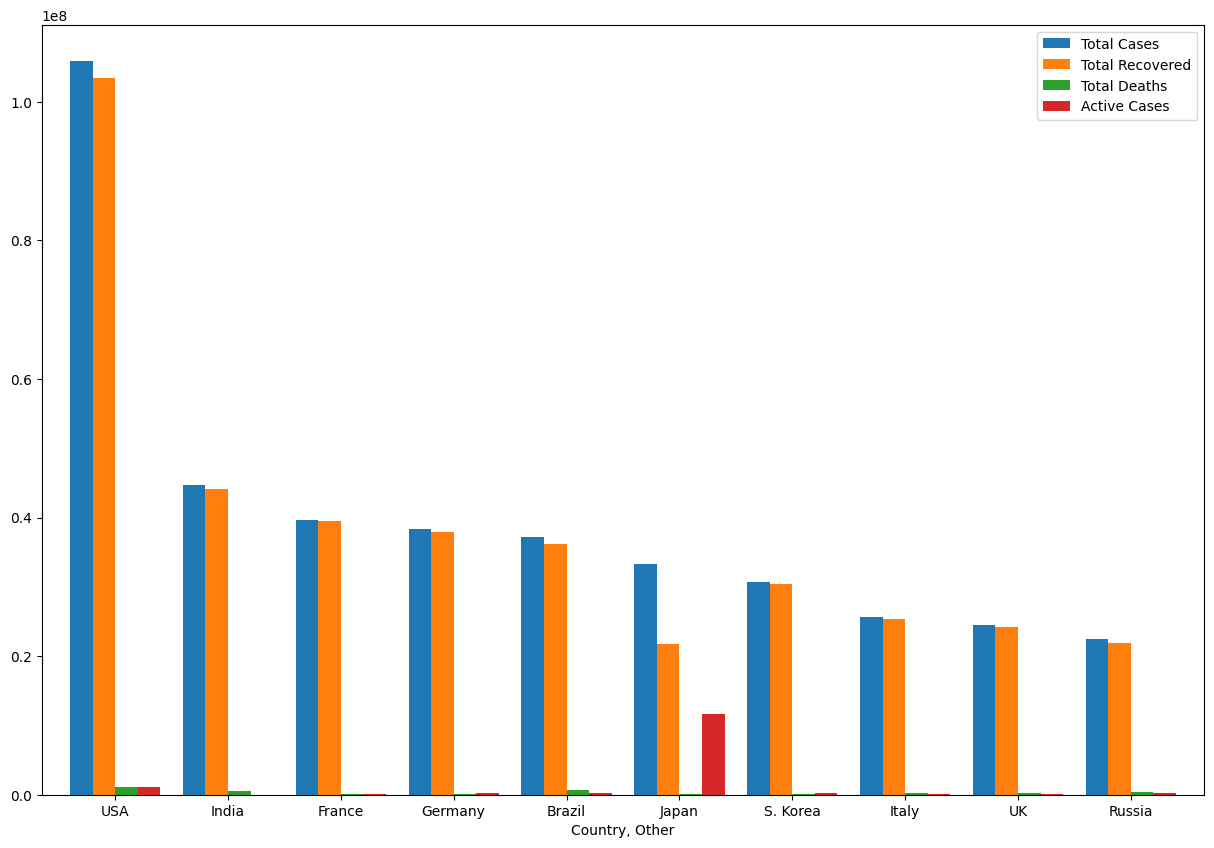

In [71]:
df1=top_10[['Country, Other','Total Cases', 'Total Recovered', 'Total Deaths','Active Cases']]
df1=df1.set_index('Country, Other')
df1.plot.bar(rot=0,width=0.8,figsize=(15,10))

`Comment:`
- The speed of disease recovery of all countries is very good ('TotalRecovered' is approximately equal to 'TotalCases'), all countries do not have any significant difference.
- USA and Japan are countries that have a large percentage of cases under treatment (ActiveCases / TotalCases) in the top 10, but the most prominent is only Japan, it seems that the epidemic situation is still tense here. But in general, all countries are controlling the epidemic (the ratio of ActiveCases / TotalCases is low).

#### 2. Correlation of Serious, Critical vs Active Cases:

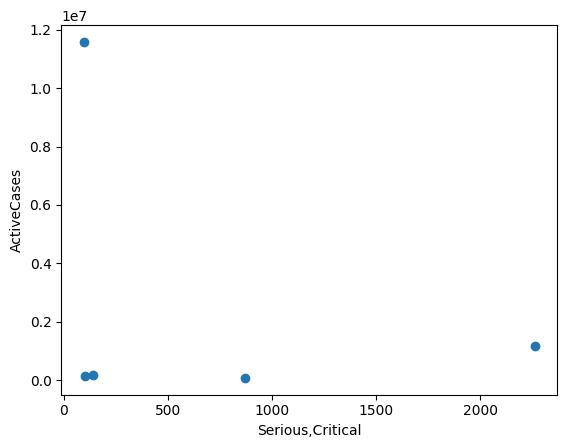

In [72]:
plt.scatter(x=top_10['Serious, Critical'], y=top_10['Active Cases'])
plt.xlabel('Serious,Critical')
plt.ylabel('ActiveCases')
plt.show()

`Comment:`
- We see two variables 'Serious, Critical' and 'ActiveCases' have no relationship with each other. But the chart still shows that there are still sick and severe cases, but not too many.

#### 3. Relationship between Total Cases/1M pop, Total Deaths/1M pop, Total Tests/1M pop:

array([[<AxesSubplot: xlabel='TotCases/ 1M pop', ylabel='TotCases/ 1M pop'>,
        <AxesSubplot: xlabel='Deaths/ 1M pop', ylabel='TotCases/ 1M pop'>,
        <AxesSubplot: xlabel='Tests/ 1M pop', ylabel='TotCases/ 1M pop'>],
       [<AxesSubplot: xlabel='TotCases/ 1M pop', ylabel='Deaths/ 1M pop'>,
        <AxesSubplot: xlabel='Deaths/ 1M pop', ylabel='Deaths/ 1M pop'>,
        <AxesSubplot: xlabel='Tests/ 1M pop', ylabel='Deaths/ 1M pop'>],
       [<AxesSubplot: xlabel='TotCases/ 1M pop', ylabel='Tests/ 1M pop'>,
        <AxesSubplot: xlabel='Deaths/ 1M pop', ylabel='Tests/ 1M pop'>,
        <AxesSubplot: xlabel='Tests/ 1M pop', ylabel='Tests/ 1M pop'>]],
      dtype=object)

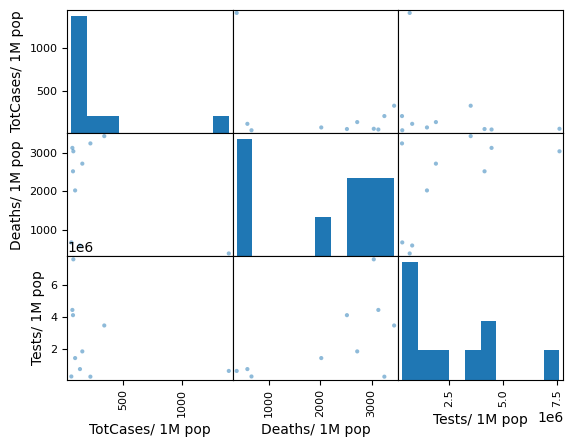

In [73]:
top_10['TotCases/ 1M pop'] = top_10['Total Cases']/ top_10['1M pop']
df1=top_10[['TotCases/ 1M pop','Deaths/ 1M pop','Tests/ 1M pop']]
pd.plotting.scatter_matrix(df1)

`Comment:`
- The histograms of 'TotCases/1M pop', 'Tests/1M pop', 'Deaths/1M pop' are not normally distributed.
- Histograms of all 3 properties tend to increase, but not too much.
- There is a positive relationship between 'TotCases/1M pop' and 'Tests/1M pop', that is, if 'Tests/1M pop' increases, 'TotCases/1M pop' also increases.
- There exists a weak relationship between 'Deaths/1M pop' and the other two variables. If the total number of tests or the total number of infections increases, the mortality rate also increases, but the rate of increase is not too high.

#### 4. Is there a causal relationship between the two fields Total Cases and Total Tests? (The number of infections is high because there are many tests?)

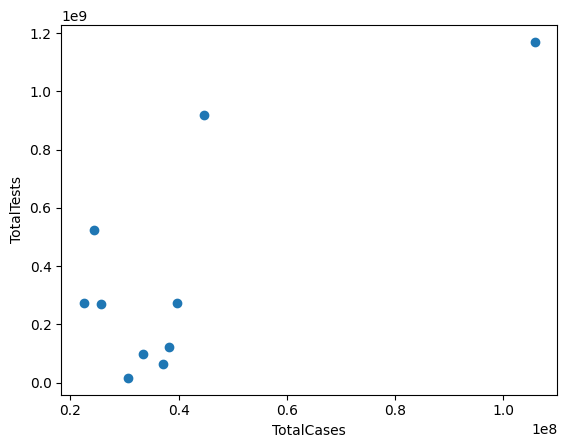

In [74]:
plt.scatter(x=top_10['Total Cases'], y=top_10['Total Tests'])
plt.xlabel('TotalCases')
plt.ylabel('TotalTests')
plt.show()

`Comment:`
- There is a positive correlation between 'Total Cases' and 'Total Tests', we see that if 'TotalCases' increases, 'TotalTests' also increases and vice versa.

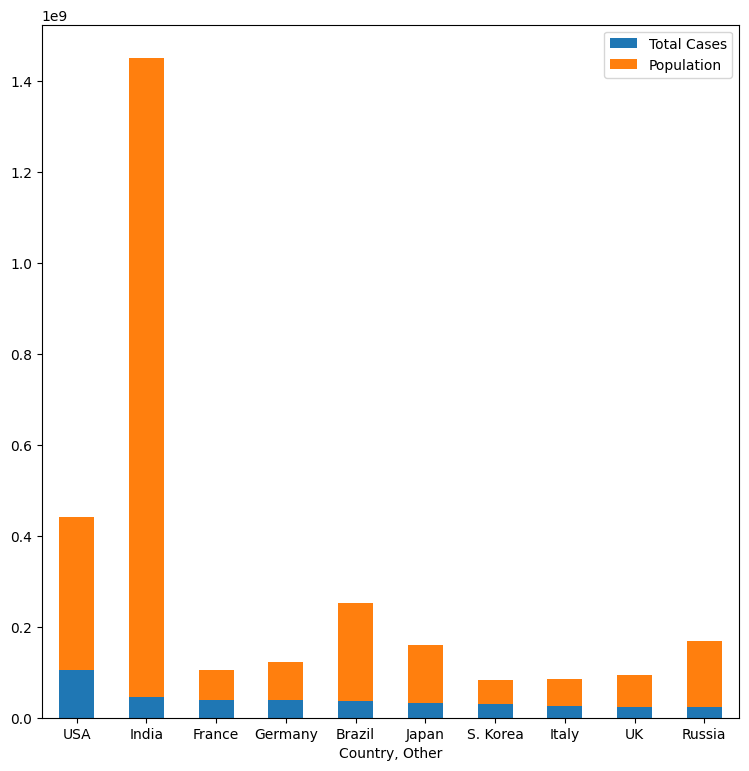

In [75]:
df1=top_10[['Country, Other','Total Cases', 'Population']]
#set index
df1=df1.set_index('Country, Other')
plot= df1.plot.bar(stacked=True,figsize=(9,9),rot=0)

### Top 10 most populous countries data:

In [76]:
top10_population_df = df.sort_values(by=['Population'], ascending=False, ignore_index=True).iloc[:10, :]
top10_population_df

,"Country, Other",Total Cases,Total Deaths,Total Recovered,Active Cases,"Serious, Critical",1M pop,Deaths/ 1M pop,Total Tests,Tests/ 1M pop,Population,Continent
0,China,503302,5272.0,379053.0,118977.0,NaN,347.0,4.0,1.600000e+08,110461.0,1.448471e+09,Asia
1,India,44693506,530795.0,44157685.0,5026.0,NaN,31773.0,377.0,9.200129e+08,654054.0,1.406632e+09,Asia
2,USA,105820390,1151253.0,103485147.0,1183990.0,2261.0,316065.0,3439.0,1.169977e+09,3494499.0,3.348053e+08,North America
3,Indonesia,6740727,160968.0,6576058.0,3701.0,NaN,24149.0,577.0,1.141589e+08,408975.0,2.791345e+08,Asia
4,Pakistan,1578047,30645.0,1538689.0,8713.0,15.0,6876.0,134.0,3.057086e+07,133213.0,2.294890e+08,Asia
5,Nigeria,266641,3155.0,259938.0,3548.0,11.0,1230.0,15.0,5.708974e+06,26339.0,2.167469e+08,Africa
6,Brazil,37145514,699634.0,36249161.0,196719.0,NaN,172486.0,3249.0,6.377617e+07,296146.0,2.153536e+08,South America
7,Bangladesh,2037947,29445.0,1998448.0,10054.0,NaN,12139.0,175.0,1.525440e+07,90862.0,1.678857e+08,Asia
8,Russia,22480857,396769.0,21829610.0,254478.0,NaN,154183.0,2721.0,2.734000e+08,1875095.0,1.458059e+08,Europe
9,Mexico,7504385,333303.0,6738172.0,432910.0,NaN,57040.0,2533.0,1.968280e+07,149608.0,1.315628e+08,North America


#### 1. Relationship Total Cases, Total Recovered, Total Deaths, Total Tests:

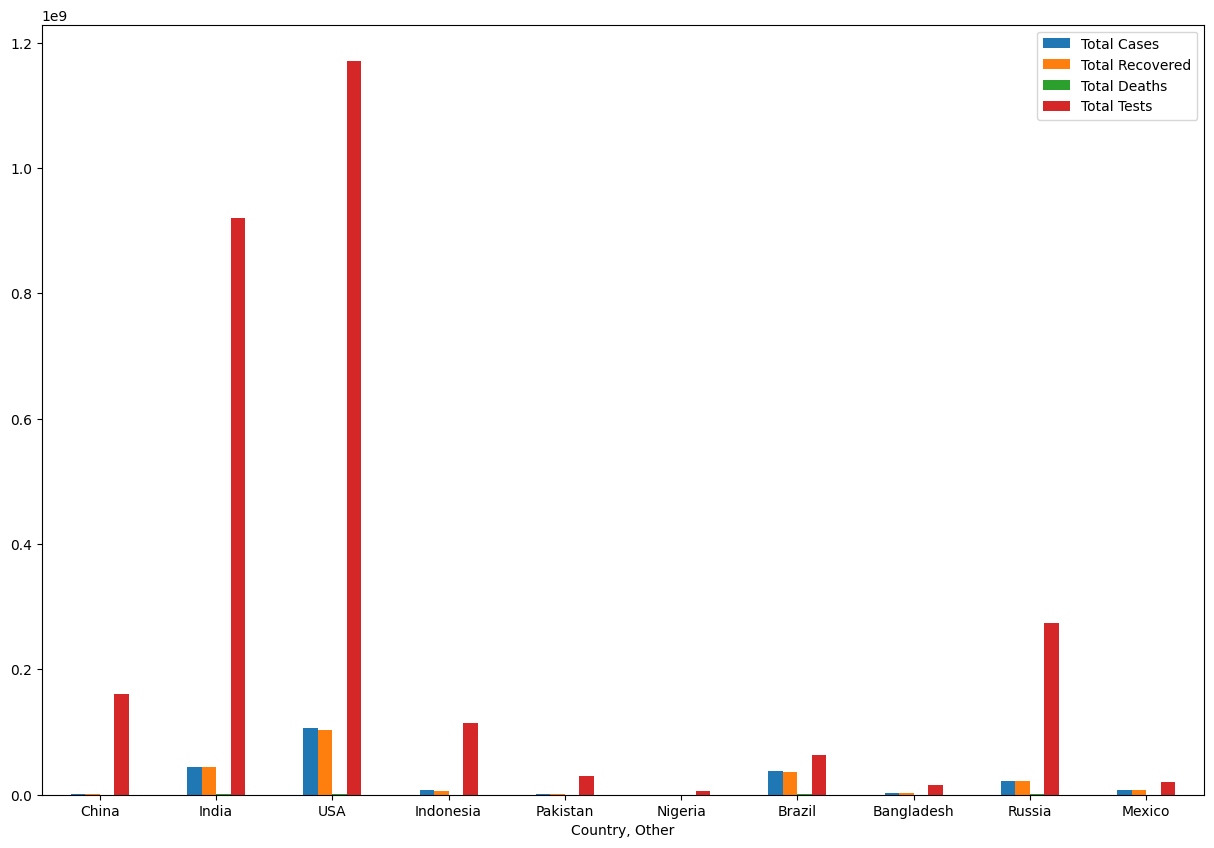

In [77]:
dfs = top10_population_df[['Country, Other', 'Total Cases', 'Total Recovered', 'Total Deaths', 'Total Tests']]
dfs = dfs.set_index('Country, Other')
ax = dfs.plot.bar(rot = 0, width = 0.5, figsize = (15,10))

`Comment:`
- Total Cases, Total Recovered, Total Deaths and Total Tests are proportional to each other. When Total Tests are higher, the remaining 3 attributes will also increase.
- The speed of disease recovery in all countries is very good (TotalRecovered is approximately equal to TotalCases).
- The number of deaths (TotalDeaths) is quite low compared to TotalCases, TotalRecovered.

#### 2. Relationship between Total Cases and Total Test:

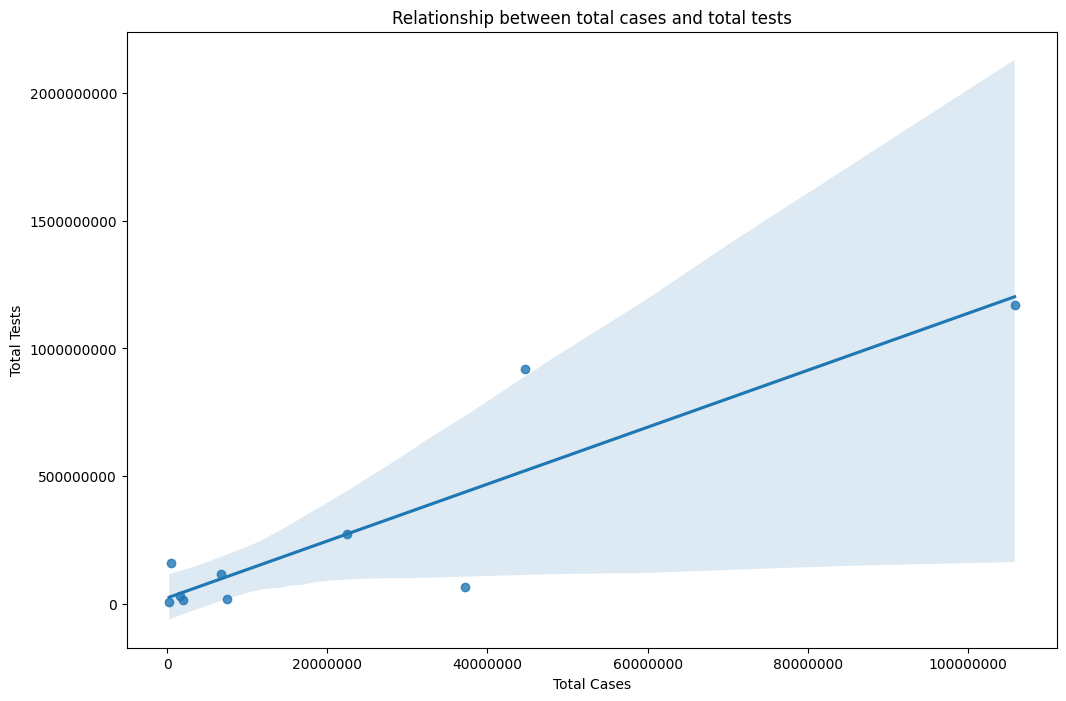

In [78]:
plt.figure(figsize = (12,8))
sns.regplot(data = top10_population_df, x = 'Total Cases', y = 'Total Tests')
plt.ticklabel_format(style = 'plain')
plt.title('Relationship between total cases and total tests')
plt.show()

`Comment:`
- These two attributes have a linear relationship with each other, the more people test, the higher the number of covid cases.